In [1]:
from MRF import *
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/GDP_h1.csv", index_col = [0])

In [4]:
data_in = data_in.iloc[:, : 100]

In [5]:
data_in.reset_index(inplace = True)

In [6]:
data_in = data_in.iloc[:, 1:]

In [7]:
oos_pos = list(data_in.index[-50:])

In [8]:
MRF = MacroRandomForest(data=data_in,
                        y_pos=0,
                        x_pos=np.arange(1,4), 
                        B= 500, 
                        resampling_opt=2,
                        oos_pos=np.arange(164,213),
                        trend_push=4,
                        quantile_rate=0.3, 
                        print_b = True,
                        fast_rw=False,
                        parallelise=True)

In [9]:
mrf_output = MRF._ensemble_loop()

In [25]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_gdp_h1.csv", index_col = "Unnamed: 0")

In [26]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [27]:
my_preds

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.009118,0.009321,0.008096,0.010757,0.009270,0.006190,0.007552,0.013137,0.013840,0.009428,...,0.007843,0.005970,0.005126,0.008129,0.004983,0.008267,0.007314,0.004794,0.009384,0.008320
1,0.006595,0.007062,0.008300,0.011413,0.012313,0.009161,0.007108,0.012548,0.011381,0.009176,...,0.006442,0.007894,0.011685,0.008774,0.003493,0.006803,0.011038,0.005452,0.009797,0.013493
2,0.007712,0.006575,0.006141,0.006703,0.008960,0.010218,0.011398,0.008319,0.008619,0.009984,...,0.009930,0.009156,0.008436,0.008097,0.007155,0.008395,0.009490,0.010010,0.007473,0.010220
3,0.005459,0.007096,0.005497,0.005122,0.012784,0.005970,0.009907,0.004140,0.009606,0.008220,...,0.005537,-0.003602,0.005849,-0.000640,-0.002825,0.007432,0.008881,0.007299,0.001571,0.011545
4,0.004608,0.008144,0.010657,0.010536,0.010273,0.008233,0.007882,0.008597,0.009764,0.008795,...,0.008843,0.007964,0.007486,0.004003,0.002371,0.007822,0.008376,0.008442,0.007220,0.011762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.012347,0.009246,0.013025,0.009084,0.013983,0.011363,0.008512,0.011030,0.010058,0.010599,...,0.010836,0.009586,0.008690,0.010115,0.007386,0.010310,0.013388,0.013632,0.011195,0.008929
496,0.008914,0.007938,0.009611,0.007456,0.010389,0.010899,0.008060,0.008332,0.010596,0.008769,...,0.008262,0.005796,0.002527,0.010976,0.011182,0.006261,0.011699,0.006104,0.001475,0.012632
497,0.006755,0.002690,0.006548,0.008287,0.010678,0.013007,0.010205,0.010204,0.008469,0.009507,...,0.004560,0.009765,0.001693,0.011472,0.009405,0.008873,0.008215,0.010782,0.011698,0.008642
498,0.006394,0.005701,0.004182,0.005771,0.007279,0.011366,0.008972,0.001272,0.001893,0.010846,...,0.003088,0.005633,-0.000481,0.006057,0.004422,0.006158,0.001872,0.002585,0.004913,0.009338


In [28]:
phils_preds.columns = my_preds.columns

In [29]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_betas_gdp_h1.csv", index_col = "Unnamed: 0")

In [30]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [31]:
phils_betas.columns = my_betas.columns

In [32]:
phils_betas.index = my_betas.index

In [33]:
phils_betas.columns = my_betas.columns

Text(0.5, 0.98, 'Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

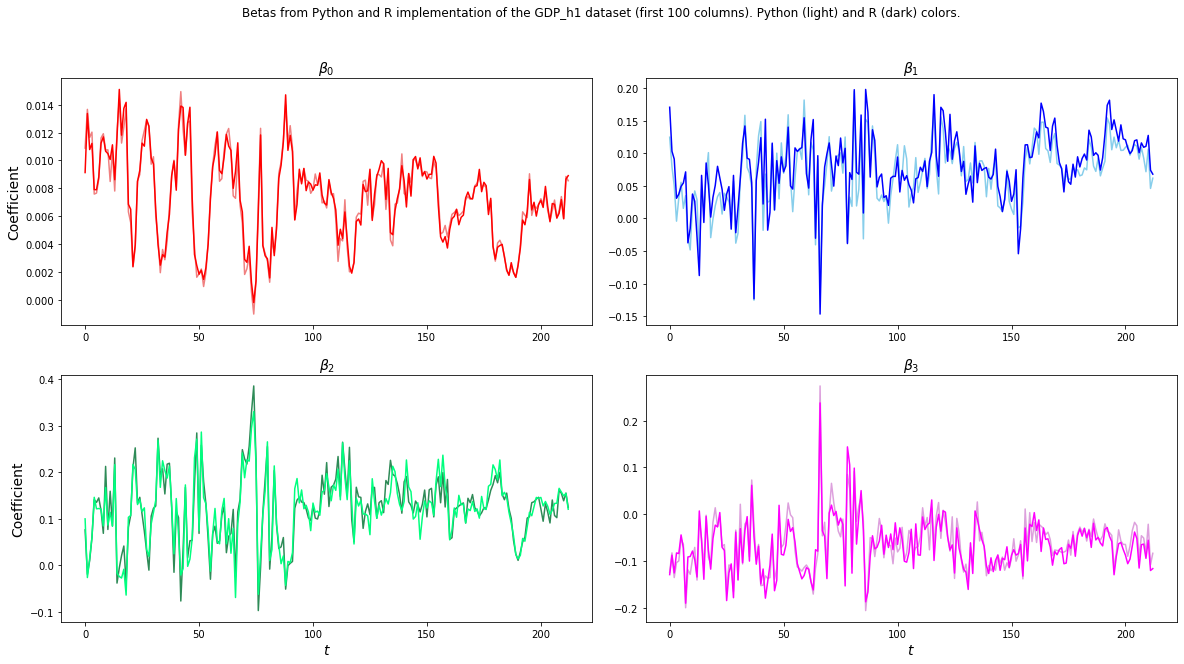

In [34]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.")

plt.rcParams['figure.figsize'] = (18,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

plt.rcParams['figure.figsize'] = (20, 10)
ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [35]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, 'R versus Python implementation of the GDP_h1 dataset (first 100 columns): average of forecasts')

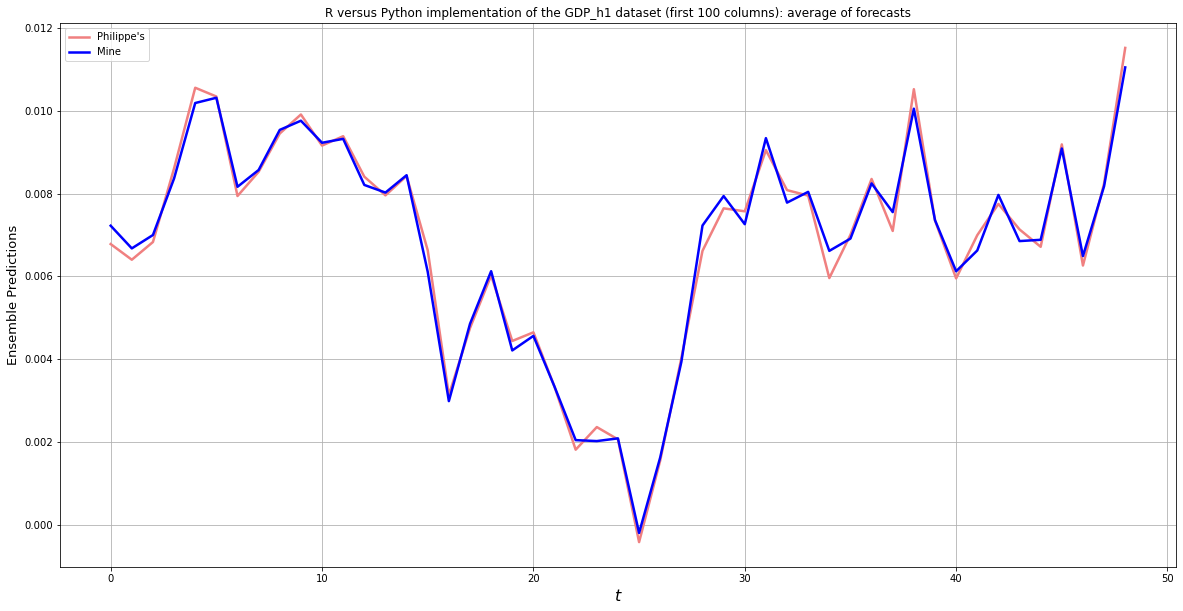

In [36]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation of the GDP_h1 dataset (first 100 columns): average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)